<span style="font-size: 160px; font-weight: bold;">ROC & AUC</span>

The example below is based on Logistic Regression, but ROC & ACU applied to more than logistic regression. The example shows mouses in two categories "is obese" and "is not obese".
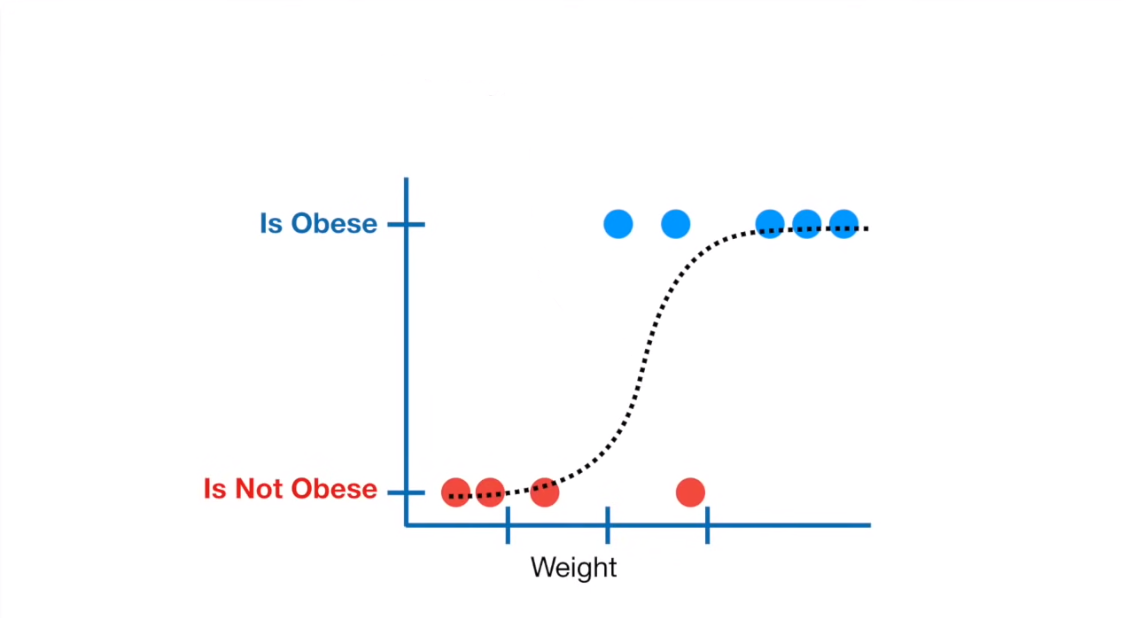

So for new data the model can tell us the probability of "is obese" and "is not obese" based on the weight. 
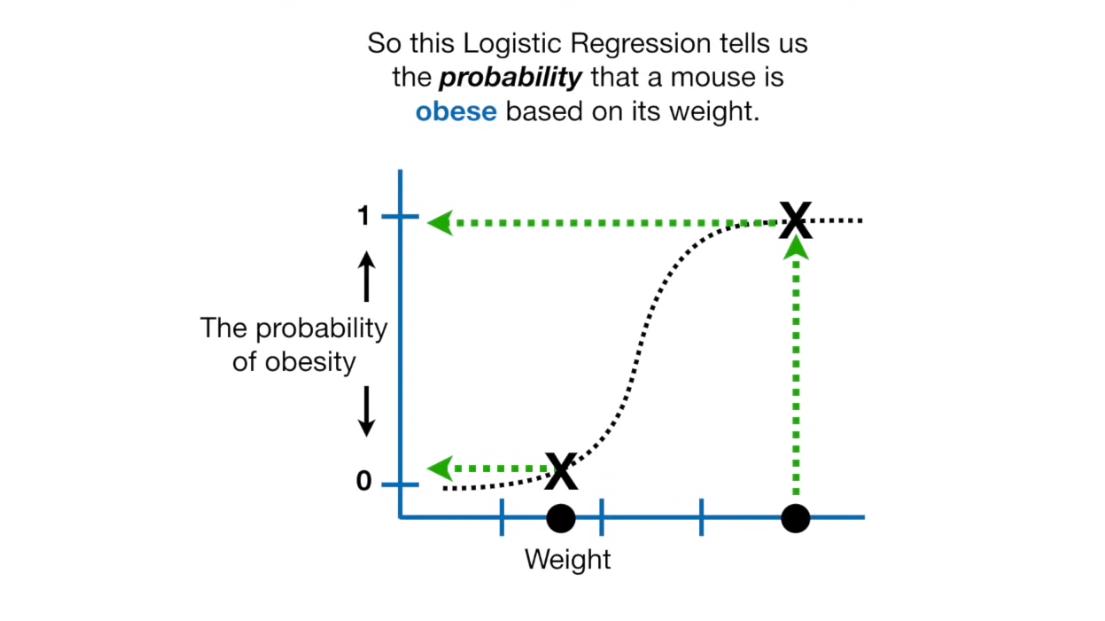

If we want to ***classify*** the mice as "obese" or "not obese", then we need a way to turn the probobility to classification. 
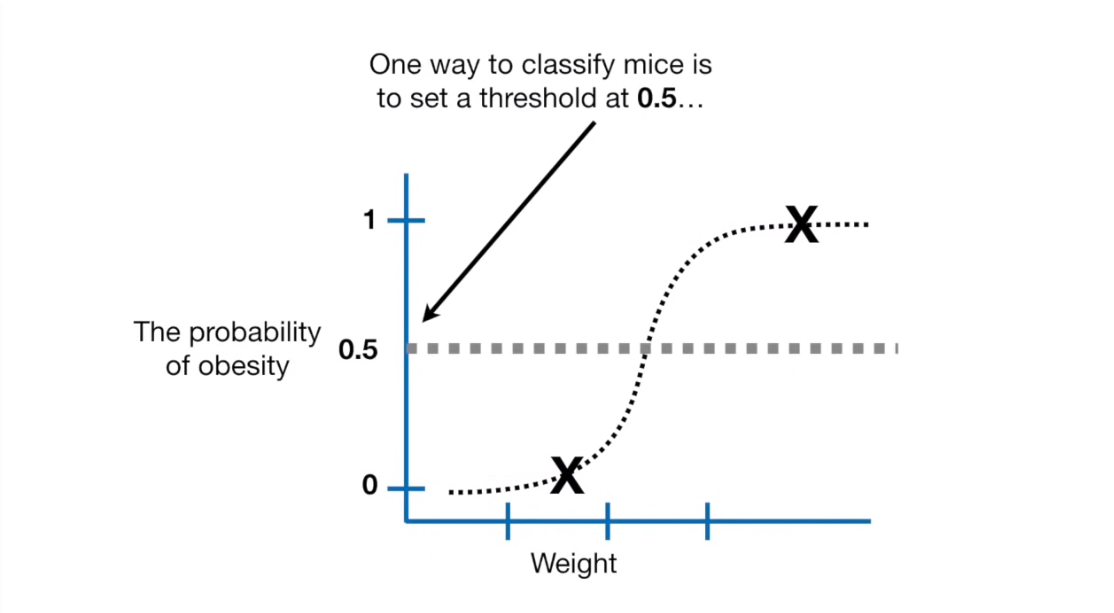
As it shown the model classify all mice with a probobility of being obese>0.5 as "obese" and all mice with a probobility of being obese<=0.5 as "not obese".

For example, if we have this 2 new data (Weight):

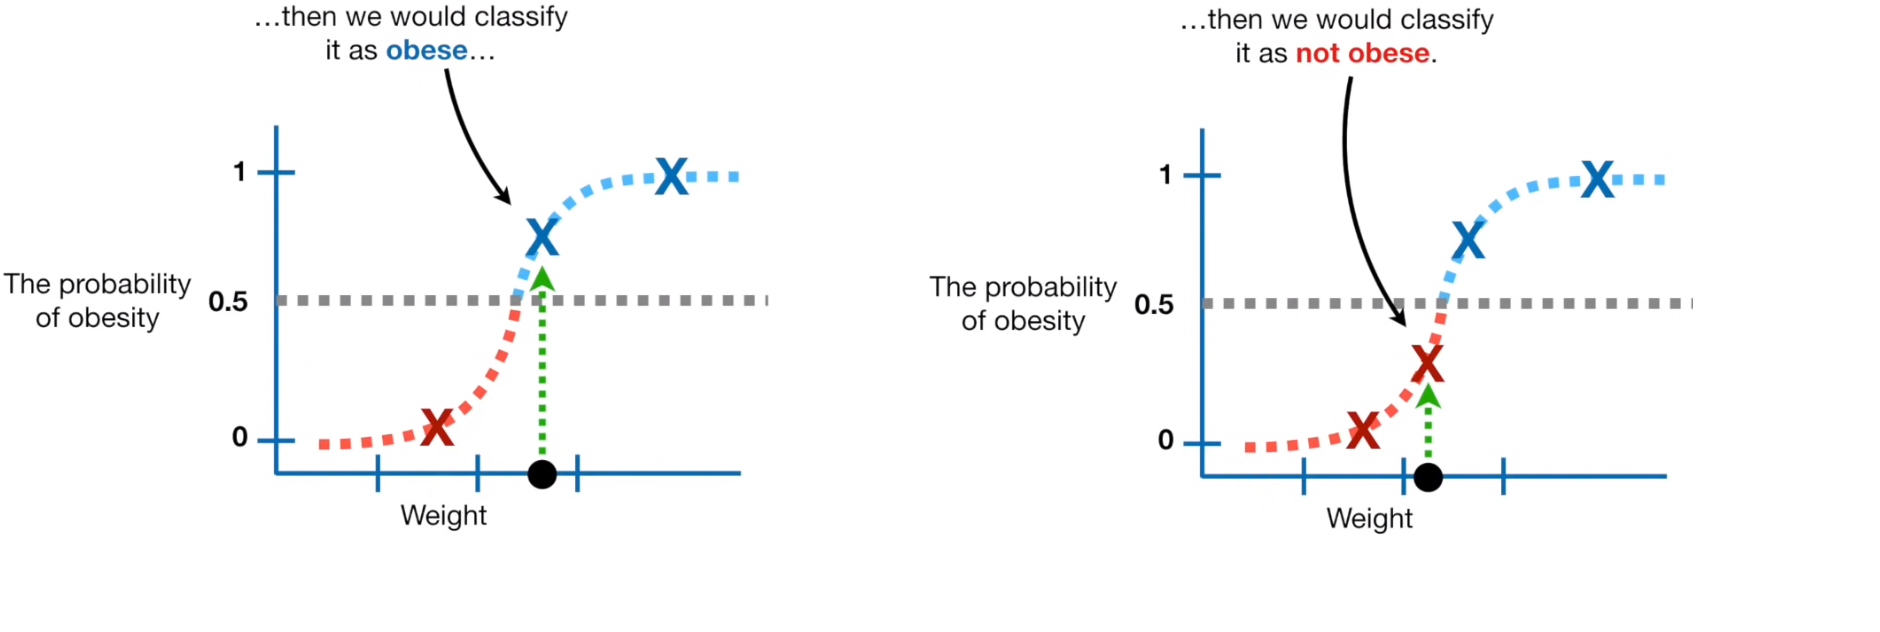

We provide new data and then summarise the result in a confusion matrix as below: 
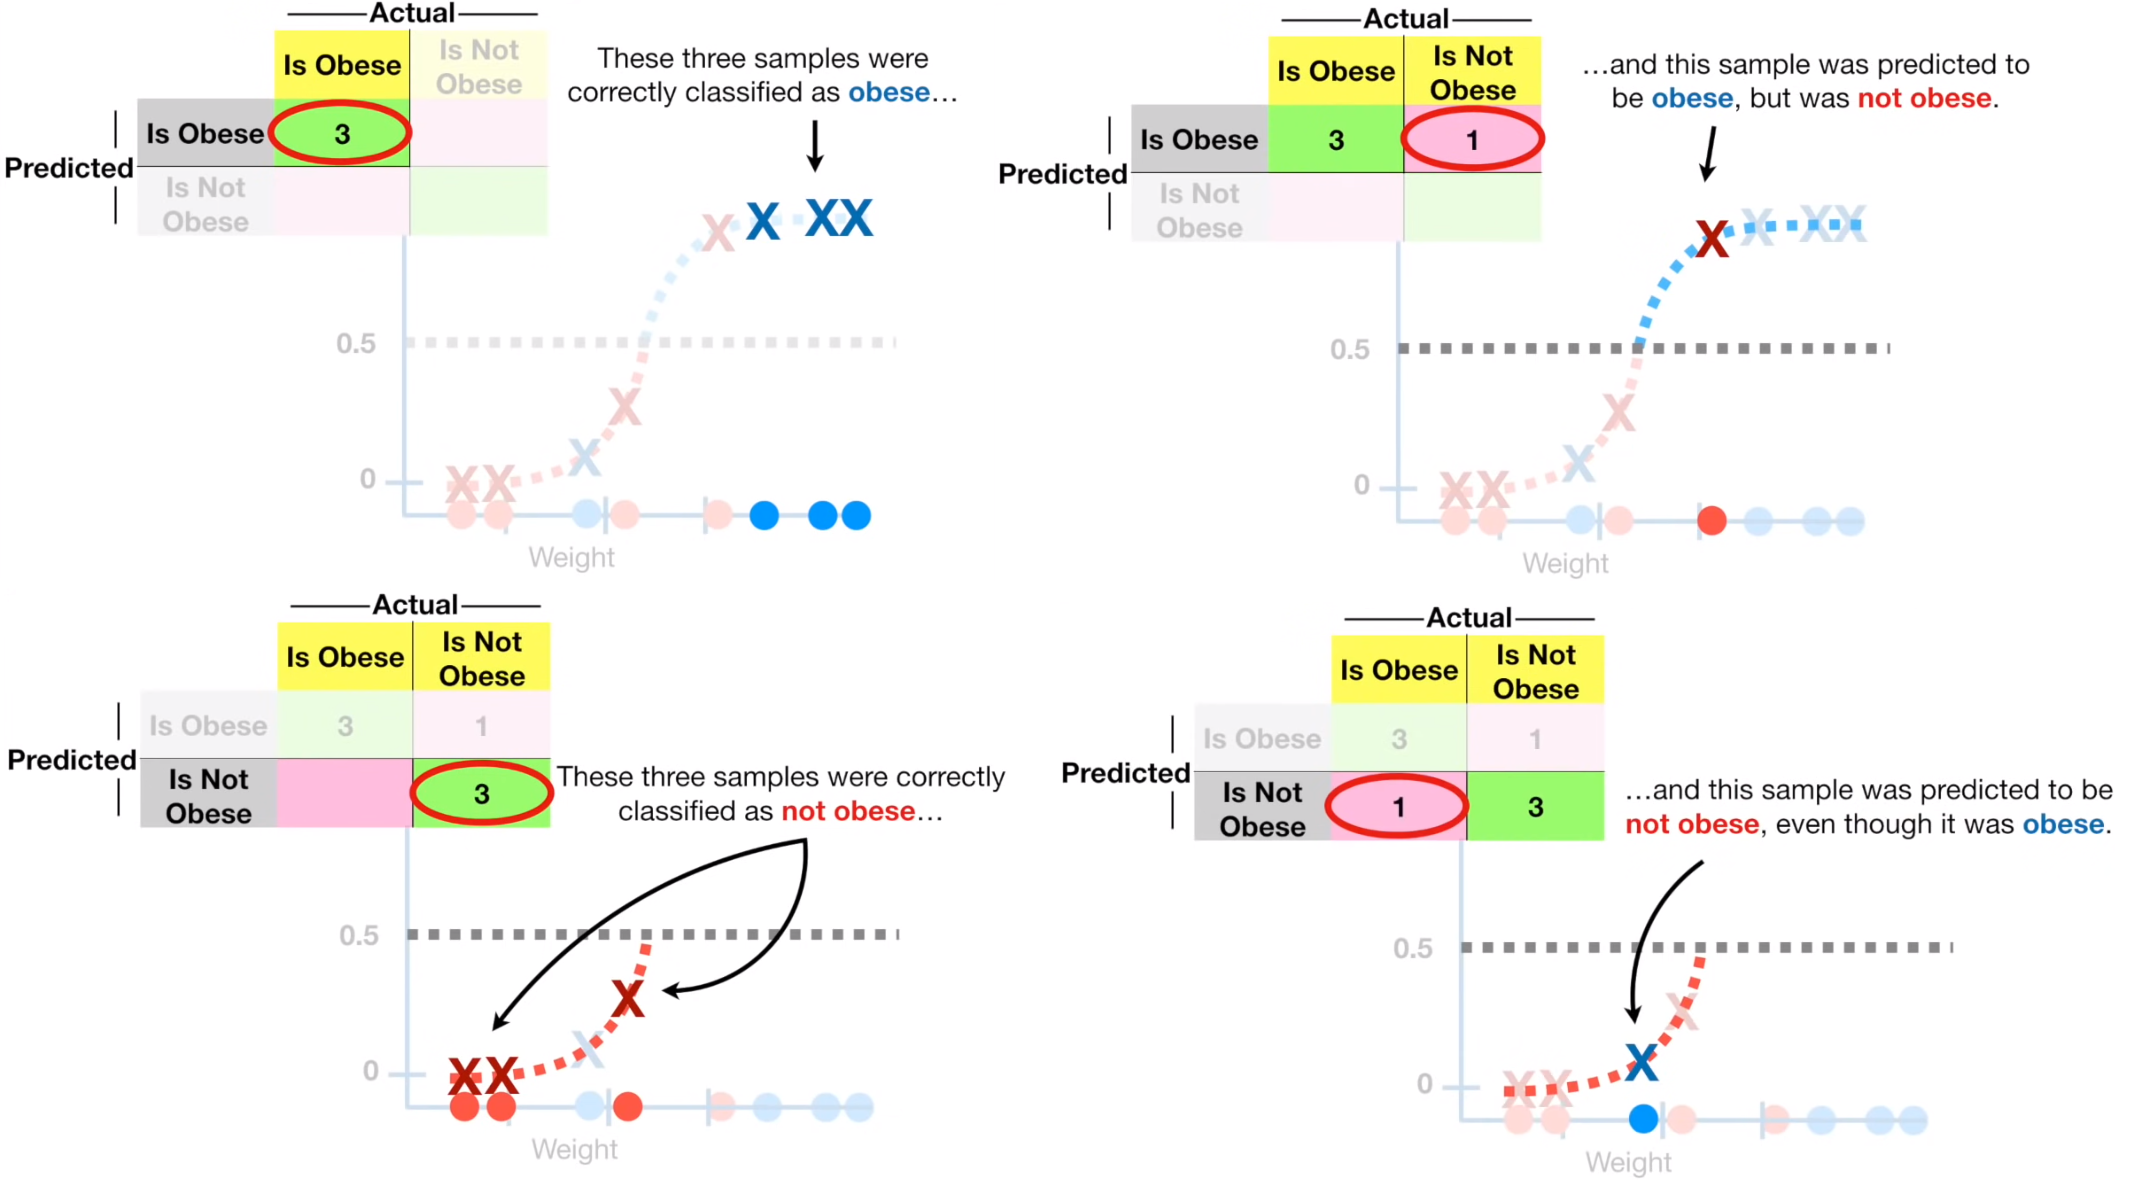

Then we change the threshold to 0.1 and do the same as above:
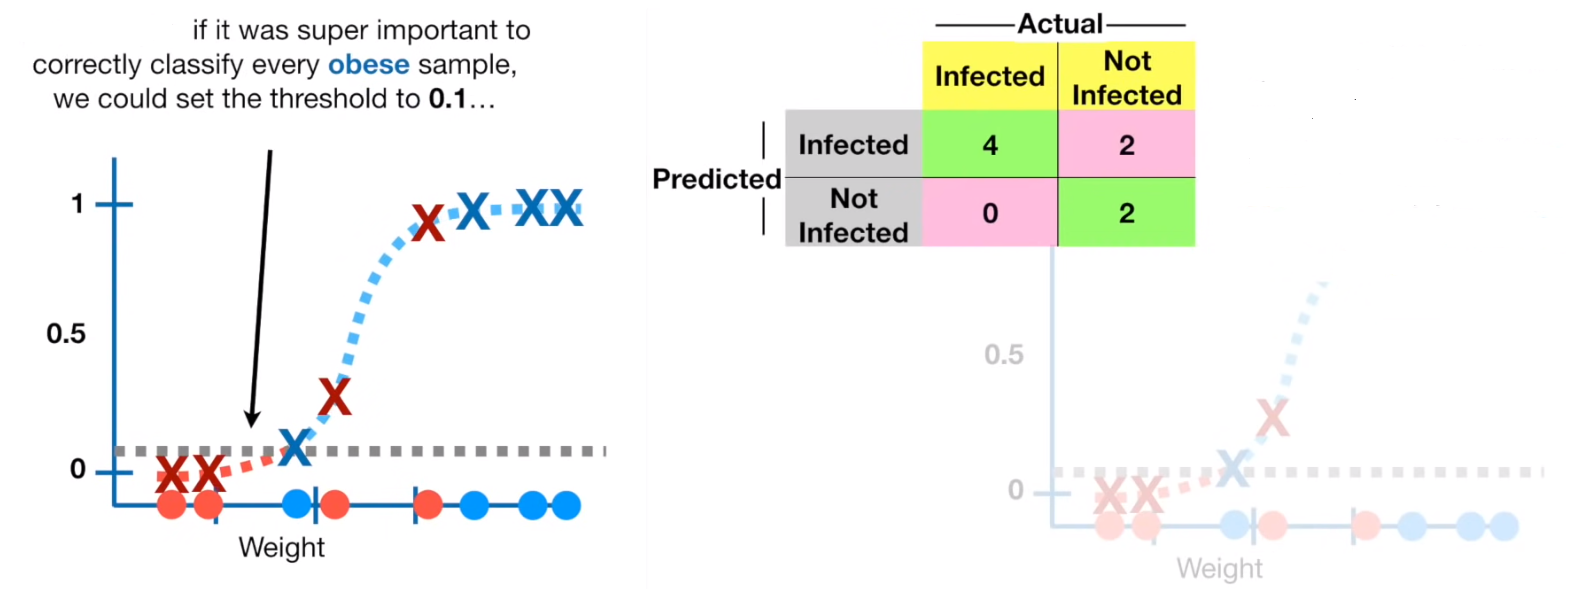

Then we change the threshhold to 0.9 and do the same as above:
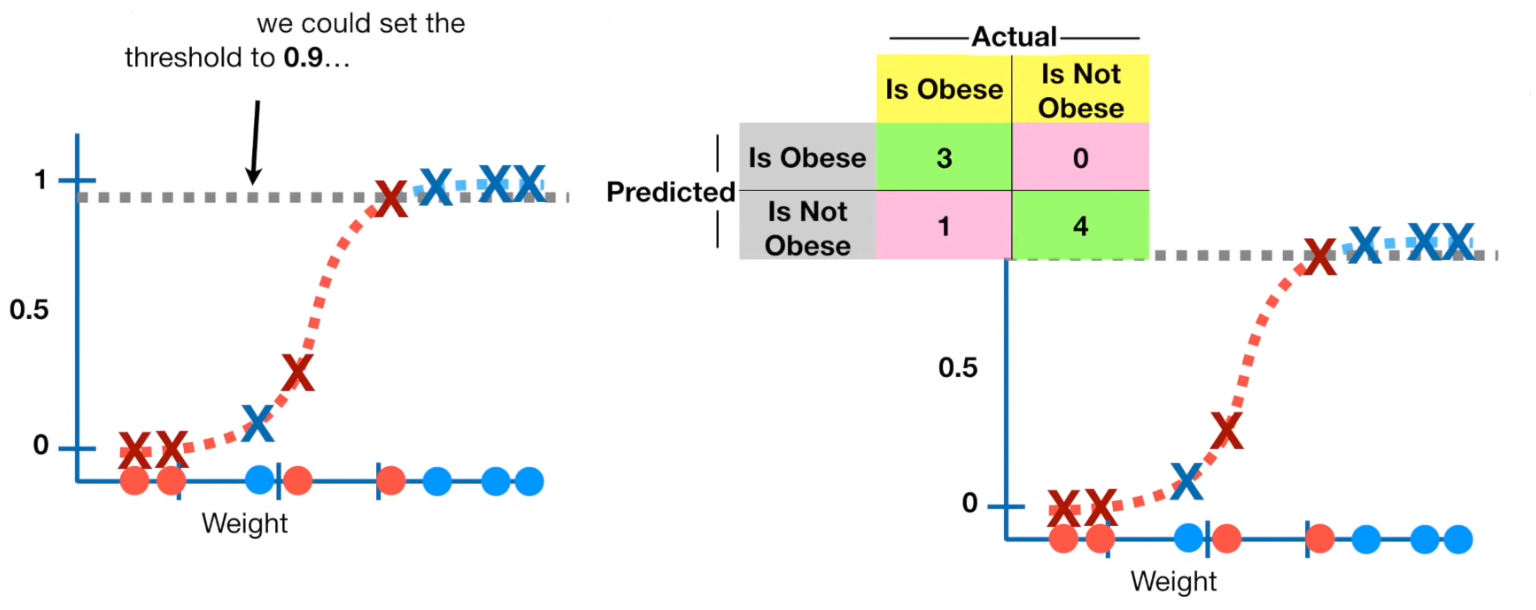

**The treshhold could be set to anything between 0 and 1. 
How do we determind wich threshhold is the best?**
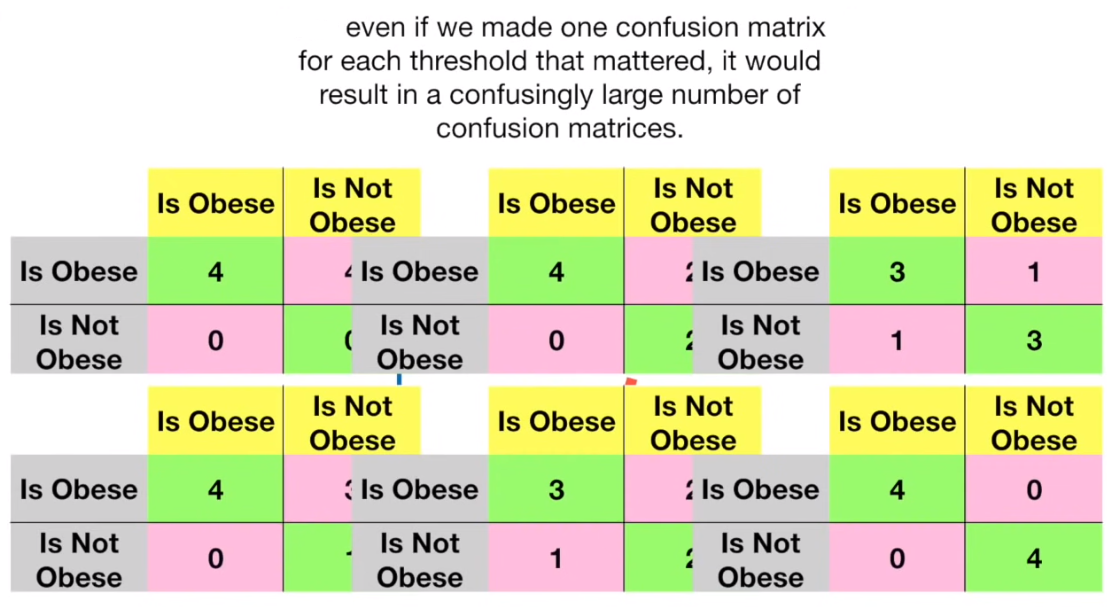

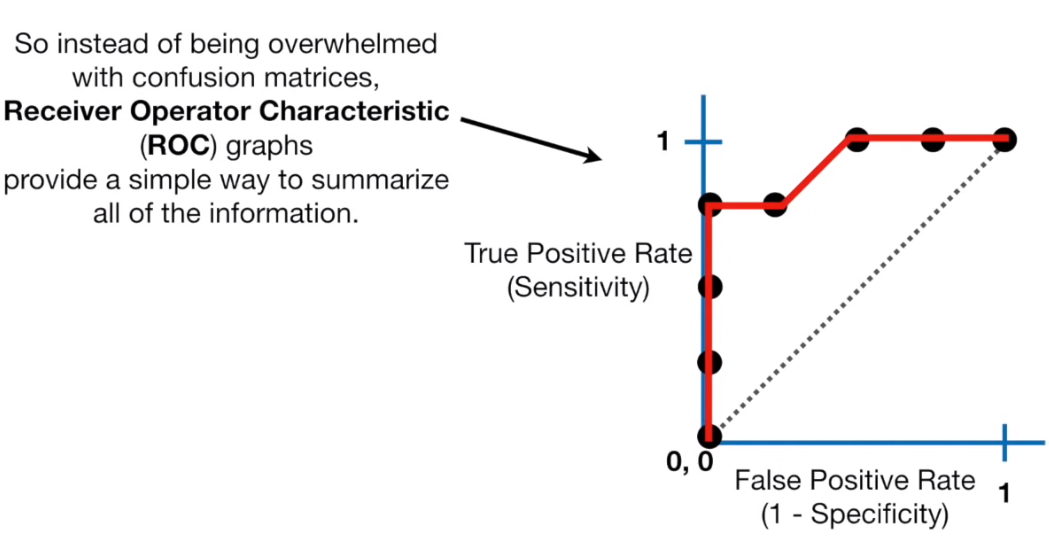

ROC calculate True Positive Rate and False Positive Rate for every Confusion Matrix.
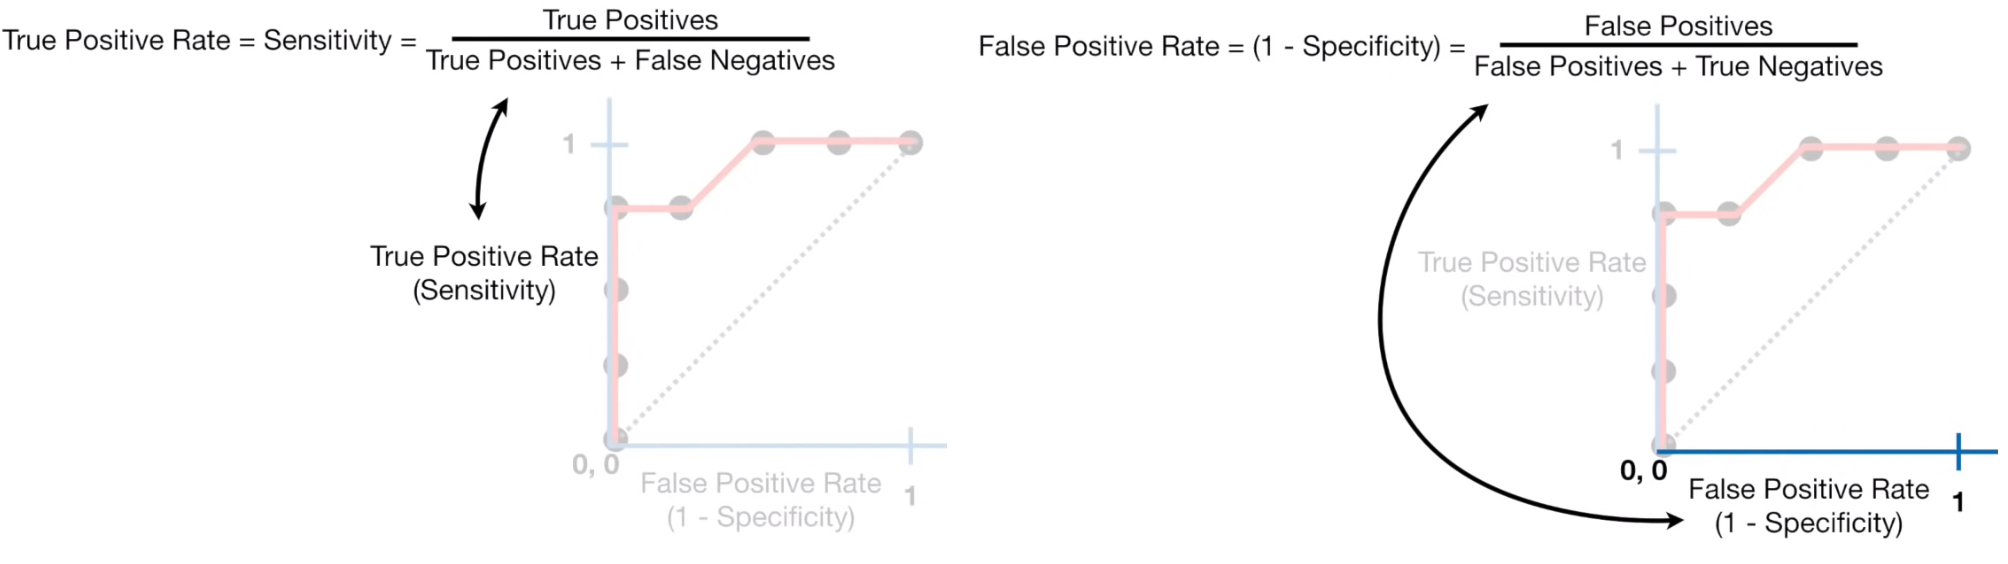

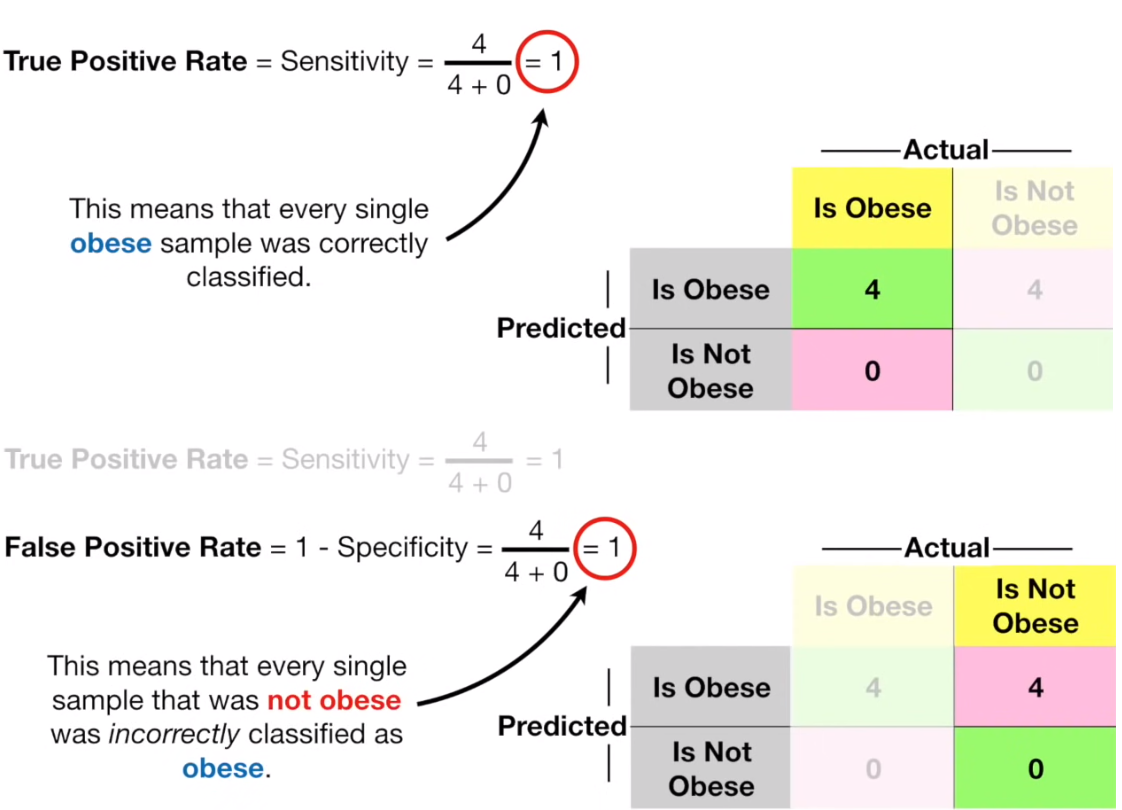

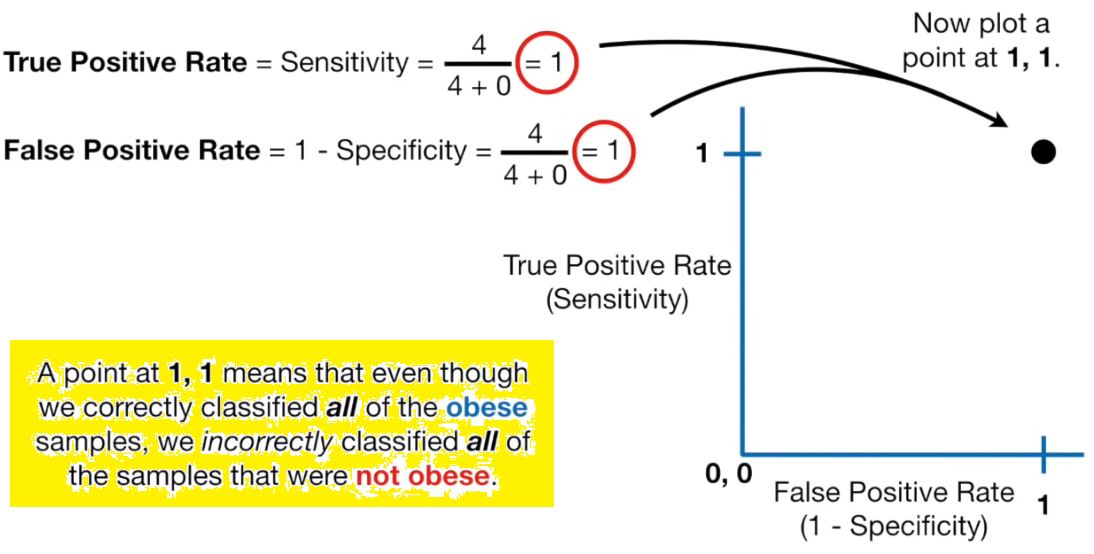

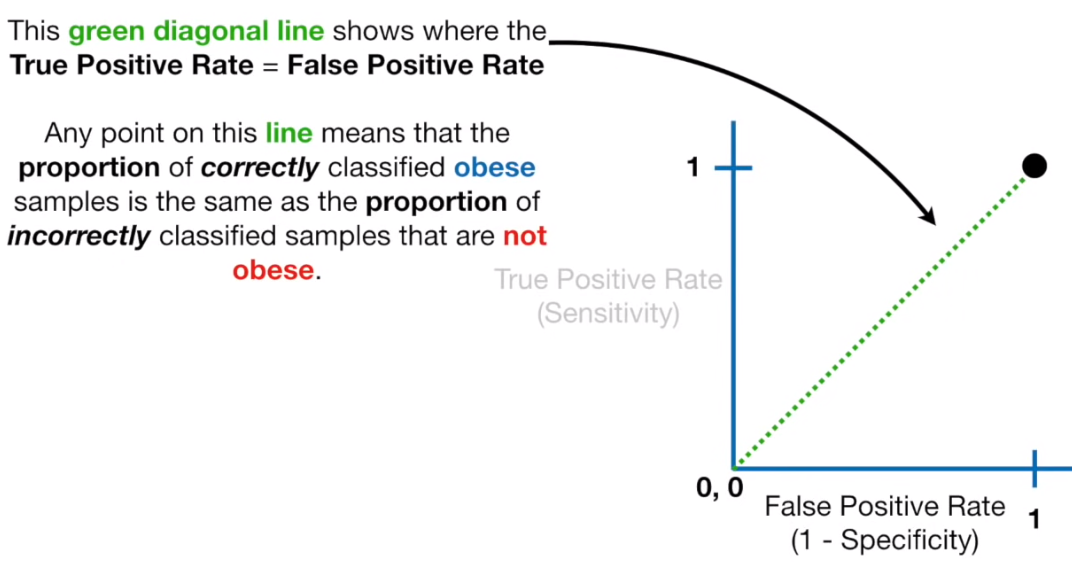

We do same calculation for another confusion matrix of another treshold:
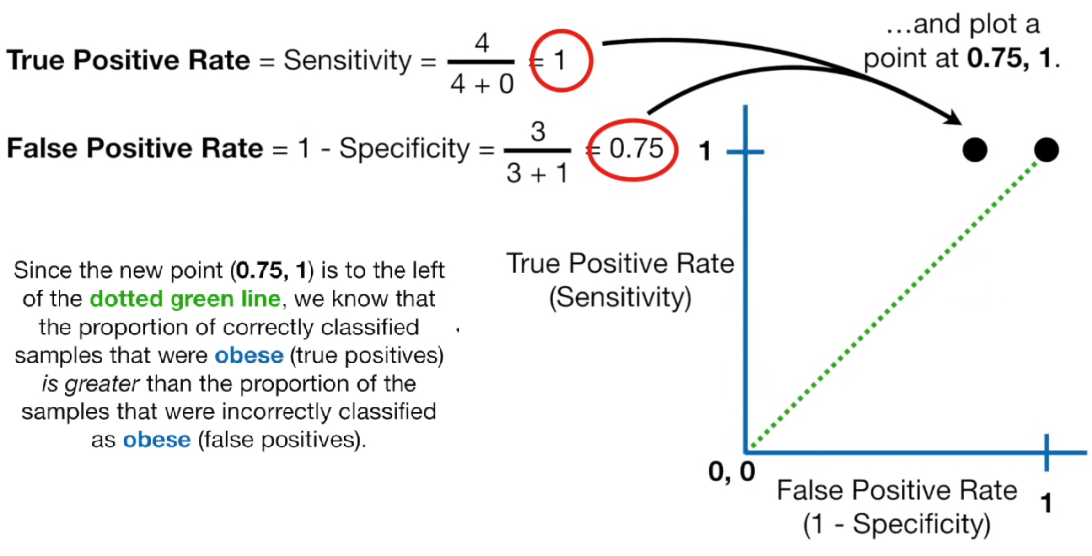
We do same calculation for all other confusion matrixs of other tresholds. 

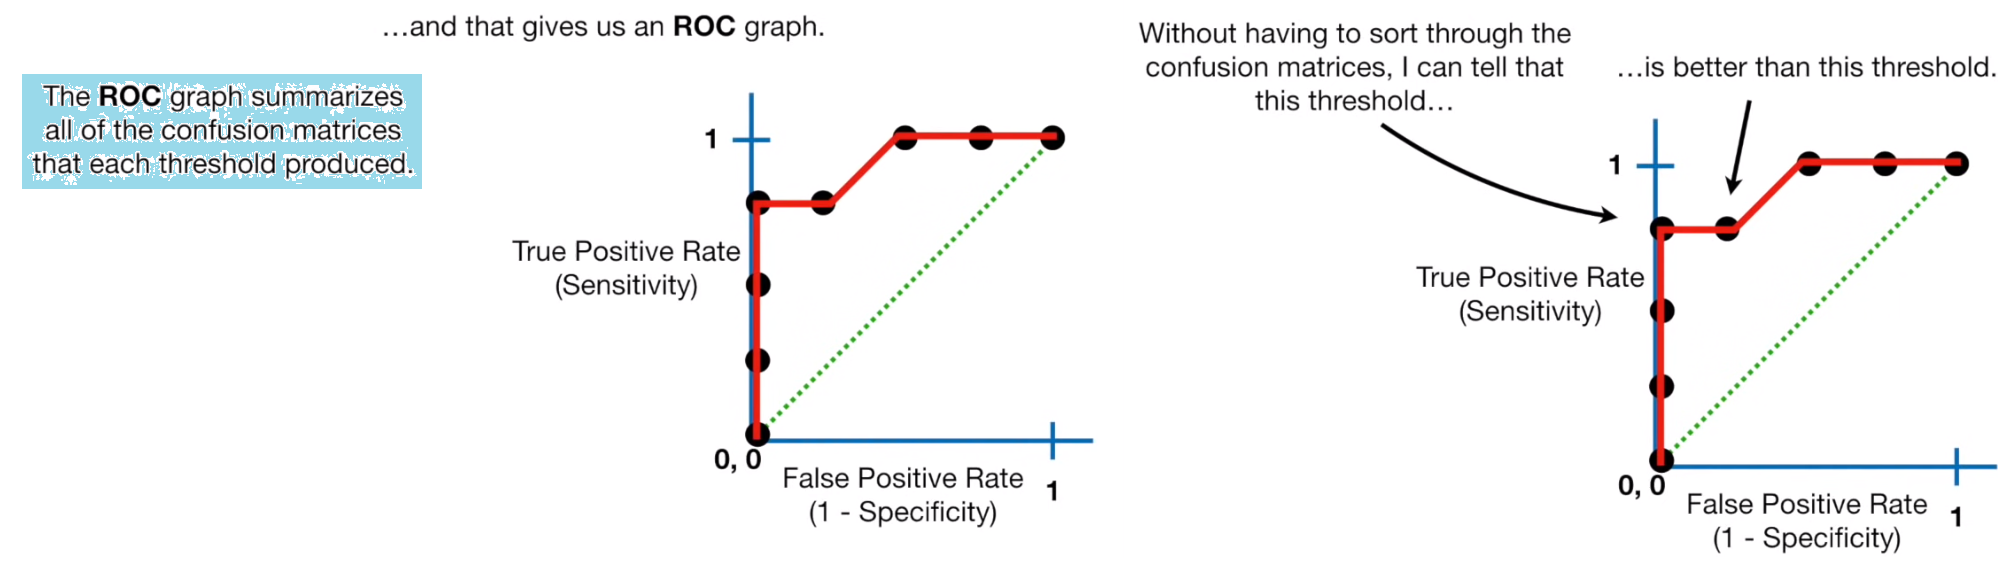

# **AUC**
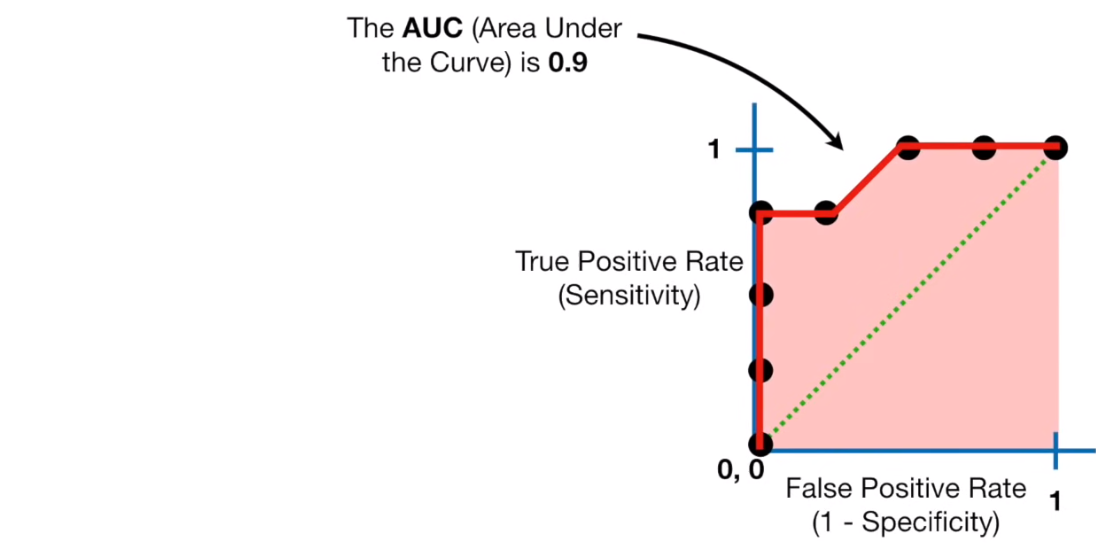

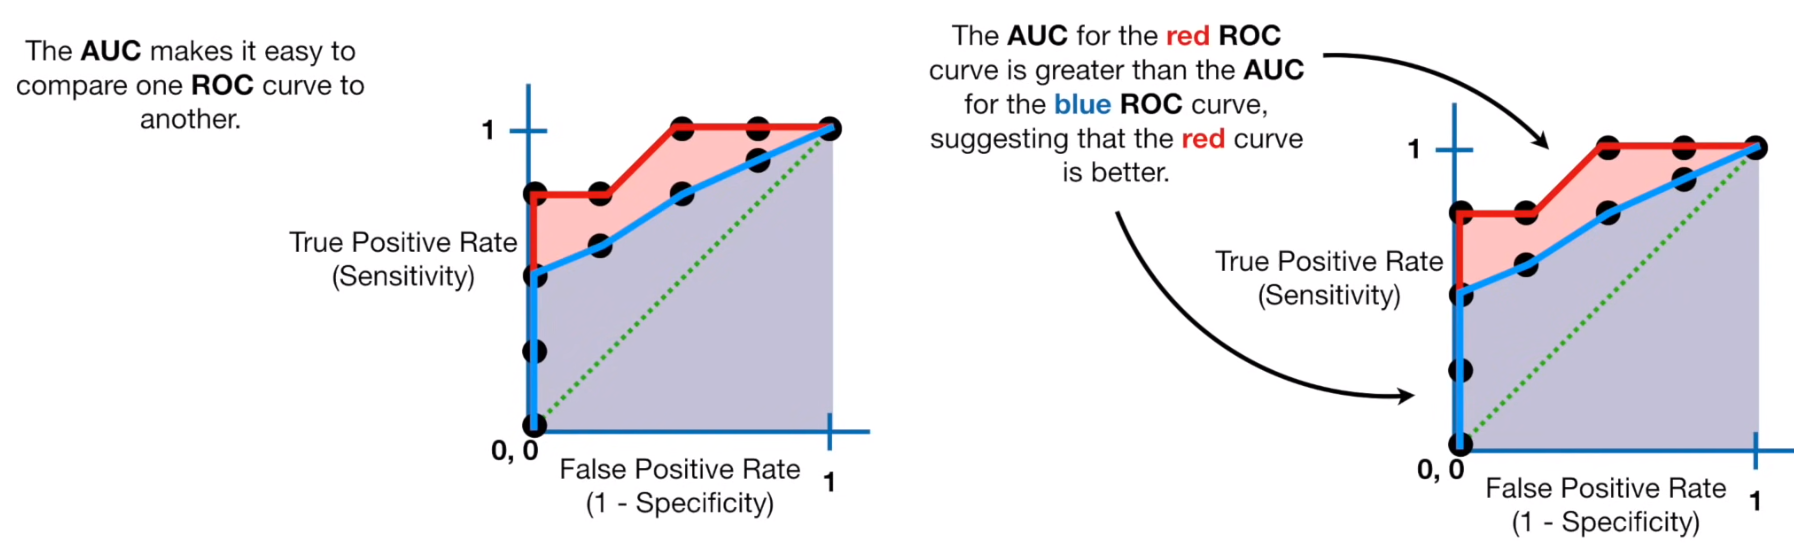

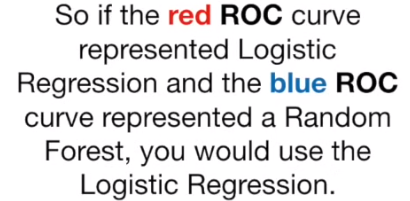

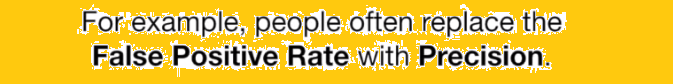
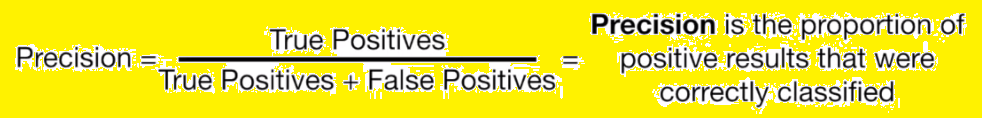

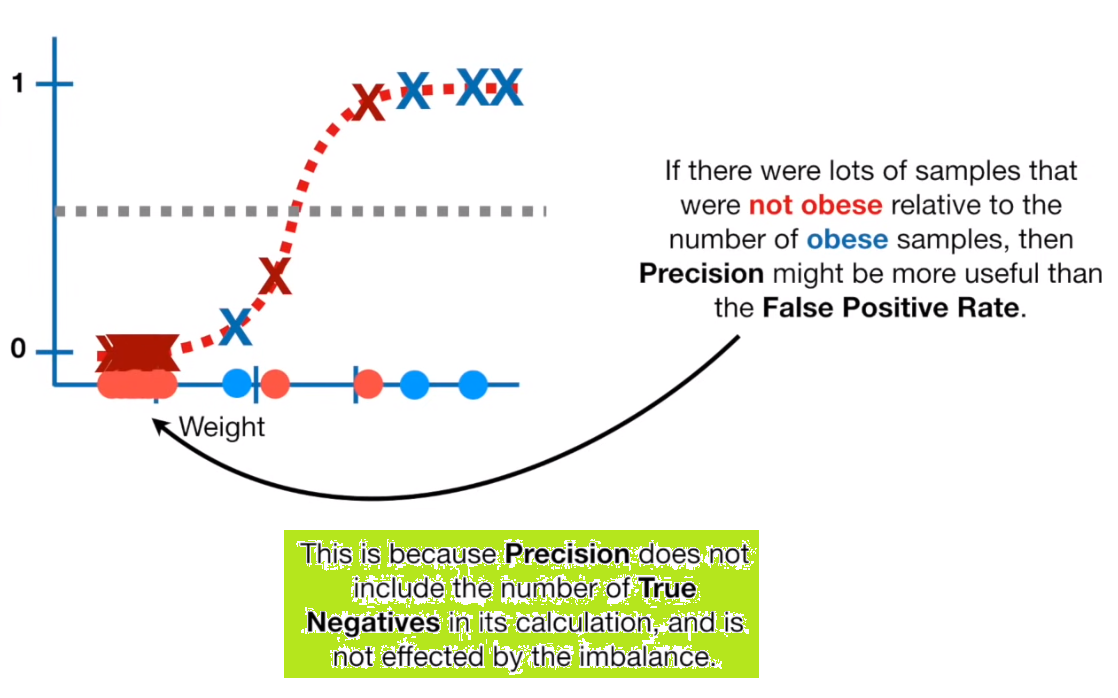

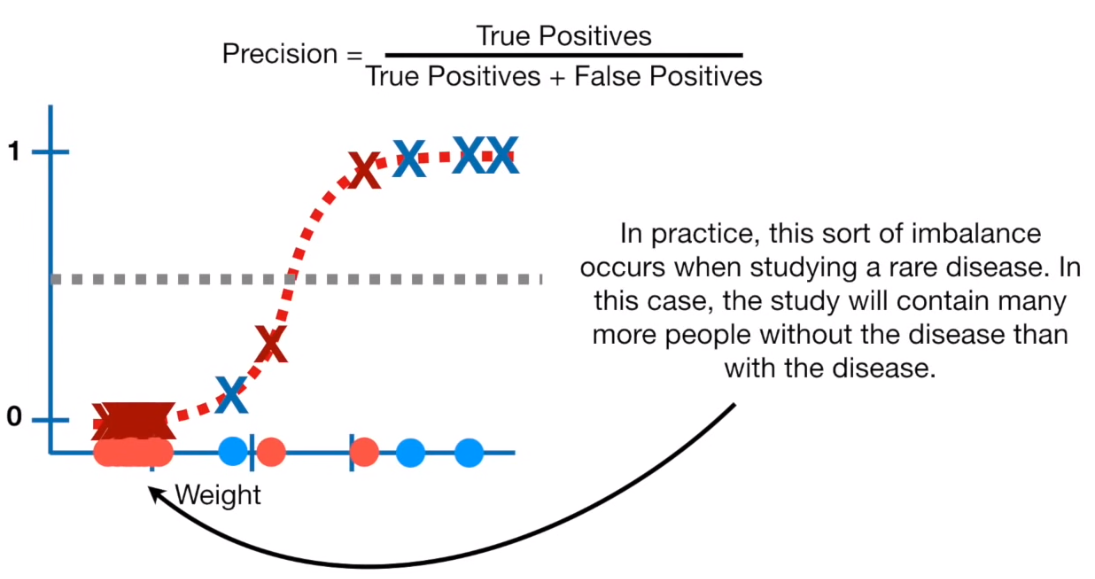

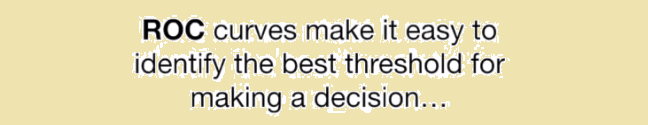
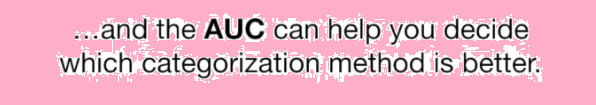

Receiver operating characteristic (**ROC**) graphs are used for selecting the most appropriate classification models based on their performance with respect to the false positive rate (FPR) and true positive rate (TPR). 

**AUC**: Represents Area Under ROC Curve. The area under ROC curve is computed to characterise the performance of a classification model. Higher the AUC better the model is at predicting.

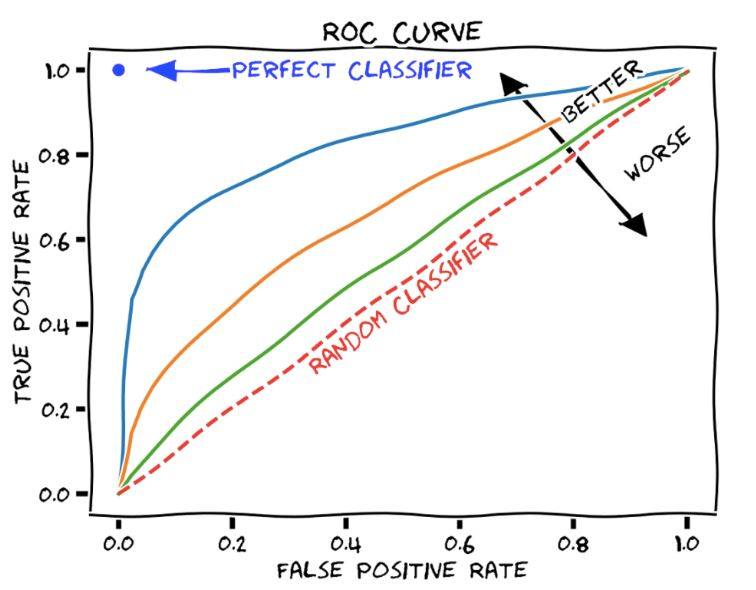

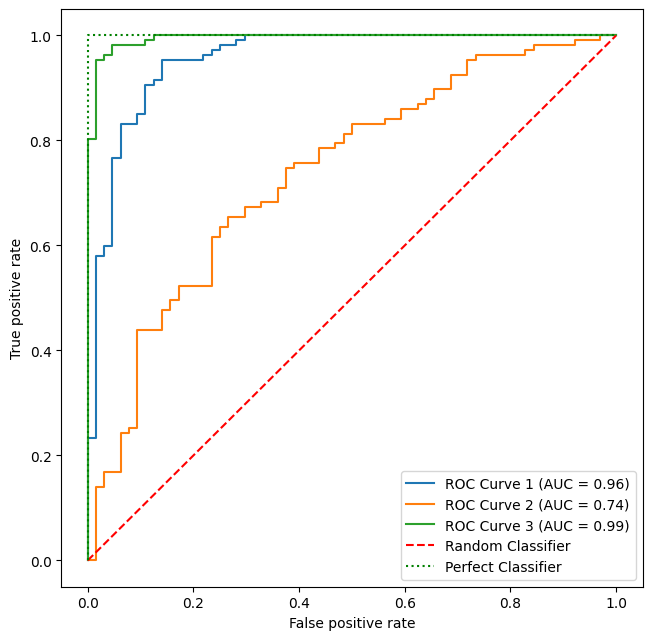

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
#
# Load the breast cancer data set
#
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
#
# Create the estimator - pipeline
#
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))
#
# Create training test splits using two features
#
pipeline.fit(X_train[:,[2, 13]],y_train)
probs = pipeline.predict_proba(X_test[:,[2, 13]])
fpr1, tpr1, thresholds = roc_curve(y_test, probs[:, 1], pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
#
# Create training test splits using two different features
#
pipeline.fit(X_train[:,[4, 14]],y_train)
probs2 = pipeline.predict_proba(X_test[:,[4, 14]])
fpr2, tpr2, thresholds = roc_curve(y_test, probs2[:, 1], pos_label=1)
roc_auc2 = auc(fpr2, tpr2)
#
# Create training test splits using all features
#
pipeline.fit(X_train,y_train)
probs3 = pipeline.predict_proba(X_test)
fpr3, tpr3, thresholds = roc_curve(y_test, probs3[:, 1], pos_label=1)
roc_auc3 = auc(fpr3, tpr3)
 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='ROC Curve 1 (AUC = %0.2f)' % (roc_auc1))
plt.plot(fpr2, tpr2, label='ROC Curve 2 (AUC = %0.2f)' % (roc_auc2))
plt.plot(fpr3, tpr3, label='ROC Curve 3 (AUC = %0.2f)' % (roc_auc3))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

Here is how the ROC curve plot will look like. Pay attention to some of the following in the plot:

* Red dashed line represents the random guessing
* Black dashed line towards top left represents the best / perfect classifier
* Other classifier have different AUC value and related ROC curve.

<span style="font-size: 160px; font-weight: bold;">The End!</span>